<a href="https://colab.research.google.com/github/V1S10US/CBR/blob/main/CBR_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv('train.csv')
train.head()

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42,2018-01-19 09:27,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:43,4-Нет,3-Малое,База,К
1,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51,2018-01-19 09:36,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:41,4-Нет,3-Малое,База,К
2,Выполнена разблокировка у/з REGION\*****,Сервис7,2-Средний,Закрыт,ФГ8,2018-01-31 07:51,2018-01-25 22:47,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47,2018-02-02 07:52,1-Особая,3-Малое,Система7,Место190
3,.Не включается ПК,АРМ,3-Низкий,Закрыт,ФГ390,2018-01-28 05:50,2018-01-25 23:13,Инцидент,Инцидент,Выход из стоя БП. Заменён.,0,2018-01-25 23:55,2018-01-26 00:00,4-Нет,3-Малое,База,Место177
4,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-03 02:51,2018-01-25 23:39,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-28 02:54,2018-02-04 07:53,4-Нет,4-Нет влияния,База,Место216


In [54]:
test = pd.read_csv('test.csv')
test.head()

,id,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,14803,Заявка на предоставление и отзыв прав доступа ...,Сервис41,3-Низкий,Закрыт,ФГ13,2018-02-22 07:51,2018-02-16 13:11,Запрос,NaN,Работы по обращению выполнены,NaN,2018-02-18 04:32,2018-02-25 07:56,4-Нет,4-Нет влияния,Система43,Место38
1,14804,Транспортный шлюз,Сервис61,2-Средний,Закрыт,ФГ1,2018-02-21 14:36,2018-02-16 13:13,Запрос,NaN,проинф у.о.,NaN,2018-02-16 17:55,2018-02-24 07:54,1-Особая,3-Малое,Система61,К
2,14805,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-03-31 06:36,2018-02-16 13:13,Запрос,NaN,Работы по обращению выполнены,NaN,2018-03-15 16:09,2018-03-23 07:56,2-Повышенная,4-Нет влияния,Система13,Место25
3,14806,Заявка на предоставление и отзыв прав доступа ...,Сервис91,3-Низкий,Отменен,ФГ13,2018-02-21 14:29,2018-02-16 13:14,Запрос,NaN,Запрос отменён пользователем из портала самооб...,NaN,2018-02-16 13:15,NaN,2-Повышенная,4-Нет влияния,Система363,Место1
4,14807,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-03-30 09:36,2018-02-16 13:14,Запрос,NaN,Работы по обращению выполнены,NaN,2018-03-15 16:09,2018-03-23 07:56,2-Повышенная,4-Нет влияния,Система13,Место25


In [62]:
train.columns

Index(['Содержание', 'Сервис', 'Приоритет', 'Статус', 'Функциональная группа',
       'Крайний срок', 'Дата обращения', 'Тип обращения на момент подачи',
       'Тип обращения итоговый', 'Решение             ',
       'Тип переклассификации', 'Дата восстановления',
       'Дата закрытия обращения', 'Критичность', 'Влияние', 'Система',
       'Место'],
      dtype='object')

In [20]:
train['Тип переклассификации'].unique()

array([0, 2, 1])

In [47]:
train.iloc[2, 9]

'Выполнена разблокировка у/з Ne_bosS\\*********\nИдентификация пользователя осуществлена.\nОбъект доступа легален.\nПричина нарушения: Несколько раз неправильный ввод пароля'

In [53]:
train[train['Критичность'] == '3-Базовая'].count()

Содержание                        941
Сервис                            941
Приоритет                         941
Статус                            941
Функциональная группа             941
Крайний срок                      941
Дата обращения                    941
Тип обращения на момент подачи    941
Тип обращения итоговый            941
Решение                           941
Тип переклассификации             941
Дата восстановления               941
Дата закрытия обращения           919
Критичность                       941
Влияние                           941
Система                           941
Место                             941
dtype: int64

In [77]:
new_cols = {'Содержание': 'description', 'Сервис': 'service', 'Приоритет': 'priority',
            'Статус':'status', 'Функциональная группа': 'func_group',
       'Крайний срок' : 'deadline', 'Дата обращения' : 'request_date', 'Тип обращения на момент подачи' : 'request_type_first',
       'Тип обращения итоговый' : 'request_type_final', 'Решение             ' : 'decision',
       'Тип переклассификации' : 'requal_type', 'Дата восстановления' : 'recovery_date',
       'Дата закрытия обращения' : 'close_request_date', 'Критичность' : 'criticality', 'Влияние':'effect', 'Система': 'system',
       'Место' : 'place'}

train = train.rename(columns=new_cols)


In [124]:
train

,description,service,priority,status,func_group,deadline,request_date,request_type_first,request_type_final,decision,requal_type,recovery_date,close_request_date,criticality,effect,system,place,criticality_percent
0,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42,2018-01-19 09:27,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:43,4-Нет,3-Малое,База,К,1.0
1,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51,2018-01-19 09:36,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:41,4-Нет,3-Малое,База,К,1.0
2,Выполнена разблокировка у/з REGION\*****,Сервис7,2-Средний,Закрыт,ФГ8,2018-01-31 07:51,2018-01-25 22:47,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47,2018-02-02 07:52,1-Особая,3-Малое,Система7,Место190,1.0
3,.Не включается ПК,АРМ,3-Низкий,Закрыт,ФГ390,2018-01-28 05:50,2018-01-25 23:13,Инцидент,Инцидент,Выход из стоя БП. Заменён.,0,2018-01-25 23:55,2018-01-26 00:00,4-Нет,3-Малое,База,Место177,1.0
4,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-03 02:51,2018-01-25 23:39,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-28 02:54,2018-02-04 07:53,4-Нет,4-Нет влияния,База,Место216,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,разблокировка учетной записи пользователя вСе...,Сервис7,2-Средний,Закрыт,ФГ8,2018-02-21 14:17,2018-02-16 13:02,Запрос,Запрос,Личность пользователя идентифицирована\nПричи...,0,2018-02-16 13:02,2018-02-23 14:18,1-Особая,3-Малое,Система7,Место50,1.0
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,3-Низкий,Закрыт,ФГ135,2018-02-21 14:36,2018-02-16 13:07,Запрос,Запрос,Выполнено,0,2018-02-21 12:03,2018-03-07 13:22,4-Нет,3-Малое,База,Место3,1.0
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,3-Низкий,Закрыт,ФГ315,2018-02-21 14:23,2018-02-16 13:08,Запрос,Запрос,Работы выполнены согласно заявке.,0,2018-02-21 07:01,2018-03-07 08:46,4-Нет,4-Нет влияния,Система2,Место163,1.0
14801,Ремонт стульев.,Сервис73,3-Низкий,Закрыт,ФГ159,2018-02-21 14:24,2018-02-16 13:09,Запрос,Запрос,выполнено,0,2018-02-17 10:01,2018-02-24 11:22,4-Нет,4-Нет влияния,Система71,Место3,1.0


Тип переквалификации:  
0 - нет переквалификации  
1 - Запрос-> Инцидент  
2 - Инцидент-> Запрос  


In [74]:
train.groupby(train.requal_type).count()

,description,service,priority,status,func_group,deadline,request_date,request_type_first,request_type_final,Решение,recovery_date,close_request_date,criticality,effect,system,place
requal_type,,,,,,,,,,,,,,,,
0,14444,14445,14445,14445,14445,14445,14445,14445,14445,14445,14392,14068,14445,14445,14445,14445
1,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140
2,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218


<Axes: >

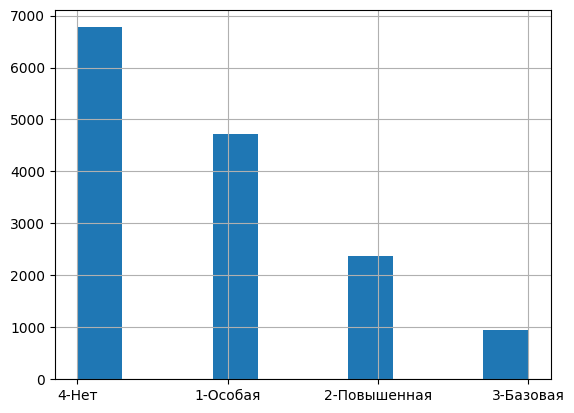

In [108]:
train.criticality.hist()

In [107]:
train['criticality_percent'] = train.criticality / len(train)
train

,description,service,priority,status,func_group,deadline,request_date,request_type_first,request_type_final,decision,requal_type,recovery_date,close_request_date,criticality,effect,system,place,criticality_percent
0,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42,2018-01-19 09:27,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:43,4-Нет,3-Малое,База,К,1.0
1,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51,2018-01-19 09:36,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:41,4-Нет,3-Малое,База,К,1.0
2,Выполнена разблокировка у/з REGION\*****,Сервис7,2-Средний,Закрыт,ФГ8,2018-01-31 07:51,2018-01-25 22:47,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47,2018-02-02 07:52,1-Особая,3-Малое,Система7,Место190,1.0
3,.Не включается ПК,АРМ,3-Низкий,Закрыт,ФГ390,2018-01-28 05:50,2018-01-25 23:13,Инцидент,Инцидент,Выход из стоя БП. Заменён.,0,2018-01-25 23:55,2018-01-26 00:00,4-Нет,3-Малое,База,Место177,1.0
4,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-03 02:51,2018-01-25 23:39,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-28 02:54,2018-02-04 07:53,4-Нет,4-Нет влияния,База,Место216,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,разблокировка учетной записи пользователя вСе...,Сервис7,2-Средний,Закрыт,ФГ8,2018-02-21 14:17,2018-02-16 13:02,Запрос,Запрос,Личность пользователя идентифицирована\nПричи...,0,2018-02-16 13:02,2018-02-23 14:18,1-Особая,3-Малое,Система7,Место50,1.0
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,3-Низкий,Закрыт,ФГ135,2018-02-21 14:36,2018-02-16 13:07,Запрос,Запрос,Выполнено,0,2018-02-21 12:03,2018-03-07 13:22,4-Нет,3-Малое,База,Место3,1.0
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,3-Низкий,Закрыт,ФГ315,2018-02-21 14:23,2018-02-16 13:08,Запрос,Запрос,Работы выполнены согласно заявке.,0,2018-02-21 07:01,2018-03-07 08:46,4-Нет,4-Нет влияния,Система2,Место163,1.0
14801,Ремонт стульев.,Сервис73,3-Низкий,Закрыт,ФГ159,2018-02-21 14:24,2018-02-16 13:09,Запрос,Запрос,выполнено,0,2018-02-17 10:01,2018-02-24 11:22,4-Нет,4-Нет влияния,Система71,Место3,1.0


In [101]:
train_cr = (train.criticality.value_counts() / len(train))[::-1]
train_cr

3-Базовая       0.063568
2-Повышенная    0.160103
1-Особая        0.318652
4-Нет           0.457677
Name: criticality, dtype: float64

In [118]:
train.groupby(train.effect).count()

,description,service,priority,status,func_group,deadline,request_date,request_type_first,request_type_final,decision,requal_type,recovery_date,close_request_date,criticality,system,place,criticality_percent
effect,,,,,,,,,,,,,,,,,
1-Всеохватывающее,5,5,5,5,5,5,5,5,5,5,5,0,5,5,5,5,5
2-Значительное,60,60,60,60,60,60,60,60,60,60,60,54,59,60,60,60,60
3-Малое,5614,5615,5615,5615,5615,5615,5615,5615,5615,5615,5615,5604,5520,5615,5615,5615,5615
4-Нет влияния,9123,9123,9123,9123,9123,9123,9123,9123,9123,9123,9123,9092,8842,9123,9123,9123,9123


In [127]:
train.recovery_date

0                     NaN
1                     NaN
2        2018-01-25 22:47
3        2018-01-25 23:55
4        2018-01-28 02:54
               ...       
14798    2018-02-16 13:02
14799    2018-02-21 12:03
14800    2018-02-21 07:01
14801    2018-02-17 10:01
14802    2018-02-17 08:18
Name: recovery_date, Length: 14803, dtype: object

In [125]:
train[train.recovery_date > train.close_request_date].count()

description            0
service                0
priority               0
status                 0
func_group             0
deadline               0
request_date           0
request_type_first     0
request_type_final     0
decision               0
requal_type            0
recovery_date          0
close_request_date     0
criticality            0
effect                 0
system                 0
place                  0
criticality_percent    0
dtype: int64

аномалия: время восстановления меньше 

In [ ]:
train.groupby(train[train.request_date == 'Saturday'])